In [8]:
import os
import sys
sys.path.insert(0, os.path.abspath('backboning.py'))

In [9]:
import pandas as pd
import random
import numpy as np
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import backboning
import poisson_backboning

# Backboning on giant dropped_file

In [63]:
data = pd.read_csv('real_net.csv')

In [64]:
data

,#nodo1,#nodo2,#peso
0,coronavirus,covid19,1066.0
1,coronavirus,covid-19,694.0
2,coronavirus,podcast,587.0
3,coronavirus,quarantine,469.0
4,corona,coronavirus,422.0
...,...,...,...
625501,Negócios e Empresas,Pensamento Positivo,1.0
625502,Negócios e Empresas,Coronavírus,1.0
625503,Neguskingra,World Wide,1.0
625504,Neguskingra,World Panic,1.0


In [65]:
str_to_drop = ['coronavirus', 'covid','Coronavirus','CORONAVIRUS','COVID','Covid']
dropped_nodo1 = data[~data['#nodo1'].str.contains('|'.join(str_to_drop))]
dropped_nodo2 = dropped_nodo1[~dropped_nodo1['#nodo2'].str.contains('|'.join(str_to_drop))]
dropped_nodo2

,#nodo1,#nodo2,#peso
15,Hip Hop,rap,218.0
19,corona,virus,193.0
21,coach,coaching,187.0
23,coaching,mentor,184.0
25,coach,mentor,183.0
...,...,...,...
625501,Negócios e Empresas,Pensamento Positivo,1.0
625502,Negócios e Empresas,Coronavírus,1.0
625503,Neguskingra,World Wide,1.0
625504,Neguskingra,World Panic,1.0


In [66]:
dropped_nodo2.to_csv('real_net_dropped.csv',index=False)

In [67]:
g = nx.read_weighted_edgelist('real_net_dropped.csv',delimiter=",",comments='#',encoding='utf8')

In [68]:
g.number_of_nodes()

42121

In [69]:
nx.density(g)

0.0006226927790201849

In [70]:
comps = list(nx.connected_components(g))

In [71]:
giant_comp = nx.subgraph(g,comps[0])

In [72]:
giant_comp.number_of_nodes()

40029

In [73]:
giant_comp.number_of_edges()

547581

In [74]:
nx.density(giant_comp)

0.0006835019128969011

In [75]:
df = nx.to_pandas_edgelist(giant_comp)
df = df.rename(columns={"source":"src","target":"trg","weight":"weight"})
df

,src,trg,weight
0,Hip Hop,rap,41.0
1,Hip Hop,Rap,57.0
2,Hip Hop,quarantine,41.0
3,Hip Hop,2020,1.0
4,Hip Hop,trap,11.0
...,...,...,...
547576,Ochida`,NouvelleCalédonie,1.0
547577,OGE,Olympus Gang Ent,1.0
547578,OGE,Olmypus Gang,1.0
547579,Olympus Gang Ent,Olmypus Gang,1.0


In [76]:
df.to_csv('real_net_giant.csv',index=False)

In [77]:
data = backboning.read('real_net_giant.csv', "weight", triangular_input=True,consider_self_loops = True, undirected = True,drop_zeroes=False,sep =",")

In [78]:
data = pd.read_csv('real_net_giant.csv')
data = data.rename(columns={"src":"src", "trg":"trg", "weight":"nij"})
data

,src,trg,nij
0,Hip Hop,rap,41.0
1,Hip Hop,Rap,57.0
2,Hip Hop,quarantine,41.0
3,Hip Hop,2020,1.0
4,Hip Hop,trap,11.0
...,...,...,...
547576,Ochida`,NouvelleCalédonie,1.0
547577,OGE,Olympus Gang Ent,1.0
547578,OGE,Olmypus Gang,1.0
547579,Olympus Gang Ent,Olmypus Gang,1.0


In [79]:
noise_corrected = backboning.noise_corrected(data, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:3072: RuntimeWarning: invalid value encountered in greater_equal
  cond1 = (k >= _a) & (k < _b)
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [80]:
noise_corrected.to_csv('real_net_noise_corr.csv',index=False)

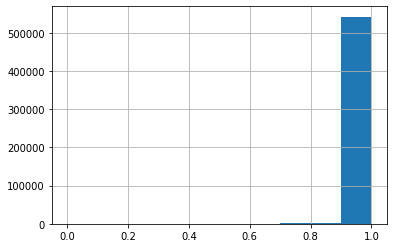

In [81]:
noise_corrected['score'].hist()

In [82]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.999)
thresholding

,src,trg,nij,score
0,Hip Hop,rap,41.0,1.000000
3532,rap,rap,19.0,1.000000
1,Hip Hop,Rap,57.0,1.000000
5643,corona,Rap,5.0,0.999887
9994,virus,Rap,13.0,1.000000
...,...,...,...,...
547301,black women,black girl magic,1.0,1.000000
547302,black women,black queens,1.0,1.000000
547346,black girl magic,black queens,1.0,1.000000
547489,Malawi,Prisons,1.0,1.000000


In [83]:
thresholding = thresholding[['src','trg','nij']]
thresholding
thresholding = thresholding.rename(columns={"src":"#src", "trg":"#trg", "nij":"#nij"})
thresholding

,#src,#trg,#nij
0,Hip Hop,rap,41.0
3532,rap,rap,19.0
1,Hip Hop,Rap,57.0
5643,corona,Rap,5.0
9994,virus,Rap,13.0
...,...,...,...
547301,black women,black girl magic,1.0
547302,black women,black queens,1.0
547346,black girl magic,black queens,1.0
547489,Malawi,Prisons,1.0


In [84]:
thresholding.to_csv('real_net_threshold.csv',index=False)

In [12]:
g = nx.read_weighted_edgelist('real_net_threshold.csv',delimiter=",",comments='#',encoding='utf8')

In [86]:
g.number_of_nodes()

40008

In [87]:
g.number_of_edges()

472649

In [88]:
nx.density(g)

0.0005905897581700447

In [151]:
degree_centrality = nx.degree_centrality(g)
sorted(degree_centrality.items(), key = lambda x: x[1],reverse=True)[-700:-1]

[('hoodyfociz', 4.683073032523942e-05),
 ('PuertoRico', 4.683073032523942e-05),
 ('The Valleycast', 4.683073032523942e-05),
 ('UD LA MERCED', 4.683073032523942e-05),
 ('Guti', 4.683073032523942e-05),
 ('GMSAA', 4.683073032523942e-05),
 ('Recipe', 4.683073032523942e-05),
 ('Barry Lewis', 4.683073032523942e-05),
 ('Francesco Iavarone', 4.683073032523942e-05),
 ('FredMagdoff', 4.683073032523942e-05),
 ('ScienceforthePeople', 4.683073032523942e-05),
 ('Hugo Farinha', 4.683073032523942e-05),
 ('HOWIE SEVERINO', 4.683073032523942e-05),
 ('WILDCAST', 4.683073032523942e-05),
 ('Harness', 4.683073032523942e-05),
 ('Heartland', 4.683073032523942e-05),
 ('Symposiyum', 4.683073032523942e-05),
 ('HealthCenter', 4.683073032523942e-05),
 ('HardDance', 4.683073032523942e-05),
 ('GodLeads', 4.683073032523942e-05),
 ('RedSea', 4.683073032523942e-05),
 ('Greg Smith', 4.683073032523942e-05),
 ('Gordon', 4.683073032523942e-05),
 ('Preparing for THE NEW', 4.683073032523942e-05),
 ('GovernorRaimondo', 4.6830

In [ ]:
plt.figure(figsize=(15,15))
nx.draw(g,node_size=15,font_size=6)

# Backboning on dropped before giant

In [90]:
data = pd.read_csv('real_net_dropped.csv')

In [91]:
data = data.rename(columns={'#nodo1':'src','#nodo2':'trg','#peso':'nij'})

In [92]:
noise_corrected = backboning.noise_corrected(data, undirected = True, return_self_loops = False, calculate_p_value = True)

Calculating NC score...
C:\Users\salva\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


In [93]:
thresholding = backboning.thresholding(noise_corrected, threshold=0.999)
thresholding

,src,trg,nij,score
0,Hip Hop,rap,218.0,1.000000
270,corona,rap,84.0,1.000000
6644,rap,rap,19.0,0.999844
288,2020,rap,71.0,1.000000
264,quarantine,rap,93.0,1.000000
...,...,...,...,...
559237,Naval Base Guam,Pacific Command,1.0,1.000000
559592,Naval Base Kitsap,Pacific Command,1.0,1.000000
559039,NZcricket,blackcaps,1.0,1.000000
559049,NYI,brendanburke,1.0,1.000000


In [94]:
renamed = thresholding.rename(columns={"src":"#src","trg":"#trg","nij":"#nij"})
renamed = renamed[['#src','#trg','#nij']]
renamed

,#src,#trg,#nij
0,Hip Hop,rap,218.0
270,corona,rap,84.0
6644,rap,rap,19.0
288,2020,rap,71.0
264,quarantine,rap,93.0
...,...,...,...
559237,Naval Base Guam,Pacific Command,1.0
559592,Naval Base Kitsap,Pacific Command,1.0
559039,NZcricket,blackcaps,1.0
559049,NYI,brendanburke,1.0


In [95]:
renamed.to_csv('real_net_prepar_to_giant.csv',index=False)

In [96]:
g = nx.read_weighted_edgelist('real_net_prepar_to_giant.csv',delimiter=",",comments='#',encoding='utf8')

In [97]:
g.number_of_nodes()

42121

In [98]:
nx.density(g)

0.0005534963002734423

In [99]:
comps = list(nx.connected_components(g))

In [100]:
giant_comp = nx.subgraph(g,comps[0])

In [101]:
giant_comp.number_of_nodes()

40029

In [102]:
giant_comp.number_of_edges()

486199

In [103]:
nx.density(giant_comp)

0.0006068836328297739